In [1]:
import pandas as pd

In [2]:
champ = pd.read_excel("U.S.DividendChampions-LIVE-1223.xlsx", sheet_name="Champions", skiprows=2, index_col="Symbol")

In [5]:
champ.head()

,Company,FV,Sector,No Years,Price,Div Yield,5Y Avg Yield,Current Div,Payouts/ Year,Annualized,...,CF/Share,ROE,Current R,Debt/Capital,ROTC,P/E,P/BV,PEG,New Member,Industry
Symbol,,,,,,,,,,,,,,,,,,,,,
ABM,ABM Industries Incorporated,NaN,Industrials,56,40.99,2.15,1.99,0.22,4,0.88,...,3.34,13.41,1.47,0.44,6.24,12.95,1.64,0.58,NaN,Commercial Services and Supplies
ADM,Archer-Daniels-Midland Company,NaN,Consumer Staples,48,73.73,2.44,2.64,0.45,4,1.80,...,3.70,15.83,1.69,0.28,7.46,10.48,1.60,0.86,NaN,Food Products
ADP,"Automatic Data Processing, Inc.",NaN,Information Technology,48,229.92,2.44,2.08,1.40,4,5.60,...,9.25,115.47,0.99,0.53,43.36,28.45,28.53,2.12,NaN,IT Services
AFL,Aflac Incorporated,NaN,Financials,41,82.71,2.42,2.49,0.50,4,2.00,...,5.60,18.67,1.21,0.35,9.75,10.64,1.99,4.49,NaN,Insurance
ALB,Albemarle Corporation,NaN,Materials,29,121.27,1.32,1.21,0.40,4,1.60,...,20.26,40.12,1.81,0.28,11.46,6.00,2.02,0.11,NaN,Chemicals


In [4]:
champ.loc[["KO", "PG"], ["High", "Low"]]

,High,Low
Symbol,,
KO,64.99,54.02
PG,158.38,122.18


In [5]:
champ.at["KO", "High"]

64.99

In [6]:
champ.sort_values(by = "No Years", ascending = False).head()

,Company,FV,Sector,No Years,Price,Div Yield,5Y Avg Yield,Current Div,Payouts/ Year,Annualized,...,CF/Share,ROE,Current R,Debt/Capital,ROTC,P/E,P/BV,PEG,New Member,Industry
Symbol,,,,,,,,,,,,,,,,,,,,,
AWR,American States Water Company,NaN,Utilities,69,85.56,2.01,1.67,0.430,4,1.7200,...,2.13,16.18,1.20,0.53,7.72,27.52,4.27,1.99,NaN,Water Utilities
DOV,Dover Corporation,NaN,Industrials,68,141.35,1.44,1.66,0.510,4,2.0400,...,7.40,22.55,1.41,0.43,11.21,20.35,4.43,2.24,NaN,Machinery
GPC,Genuine Parts Company,NaN,Consumer Discretionary,67,152.54,2.49,2.76,0.950,4,3.8000,...,8.04,31.35,1.15,0.52,13.28,19.67,5.84,1.46,NaN,Distributors
PH,Parker-Hannifin Corporation,NaN,Industrials,67,398.33,1.49,1.64,1.480,4,5.9200,...,23.22,21.71,0.89,0.55,9.87,24.04,4.86,1.58,NaN,Machinery
PG,The Procter & Gamble Company,NaN,Consumer Staples,67,152.54,2.47,2.50,0.941,4,3.7628,...,7.12,31.39,0.64,0.43,14.74,25.01,7.80,2.48,NaN,Household Products


In [7]:
champ = champ[["Company", "Sector", "Industry", "No Years", "Price", "P/E", "Div Yield", "5Y Avg Yield", "Current Div", "Previous Div", "DGR 1Y", "DGR 3Y", "DGR 5Y", "DGR 10Y"]]
champ["MR%"] = (champ["Current Div"] / champ["Previous Div"] * 100) - 100

In [8]:
champ.head()

,Company,Sector,Industry,No Years,Price,P/E,Div Yield,5Y Avg Yield,Current Div,Previous Div,DGR 1Y,DGR 3Y,DGR 5Y,DGR 10Y,MR%
Symbol,,,,,,,,,,,,,,,
ABM,ABM Industries Incorporated,Industrials,Commercial Services and Supplies,56,45.360,14.46,1.94,1.85,0.22,0.195,43.11,4.38,3.77,3.48,12.820513
ADM,Archer-Daniels-Midland Company,Consumer Staples,Food Products,48,80.330,10.08,2.24,2.72,0.45,0.400,10.40,6.19,5.36,8.83,12.500000
ADP,"Automatic Data Processing, Inc.",Information Technology,IT Services,48,249.795,26.65,2.00,2.05,1.25,1.040,18.28,10.82,13.71,10.92,20.192308
AFL,Aflac Incorporated,Financials,Insurance,41,74.310,9.38,2.26,2.46,0.42,0.400,12.33,14.24,11.31,9.05,5.000000
ALB,Albemarle Corporation,Materials,Chemicals,29,190.740,6.68,0.84,1.28,0.40,0.395,1.28,1.85,3.96,6.10,1.265823


In [9]:
len(champ)

135

In [10]:
div_bigger_than_3 = champ["Div Yield"] > 3
len(champ[div_bigger_than_3])

49

In [11]:
champ.dtypes

Company          object
Sector           object
Industry         object
No Years          int64
Price           float64
P/E             float64
Div Yield       float64
5Y Avg Yield    float64
Current Div     float64
Previous Div    float64
DGR 1Y          float64
DGR 3Y          float64
DGR 5Y          float64
DGR 10Y         float64
MR%             float64
dtype: object

In [12]:
champ["Div Yield"].mean()

2.8194814814814815

In [13]:
branche = champ.groupby("Sector")

In [14]:
branche["Div Yield"].count().sort_values(ascending = False).head()

Sector
Financials          32
Industrials         28
Consumer Staples    19
Utilities           17
Materials           12
Name: Div Yield, dtype: int64

In [15]:
branche["Div Yield"].mean().sort_values(ascending = False).head()

Sector
Energy                    5.642500
Real Estate               5.388333
Communication Services    4.150000
Utilities                 3.270588
Consumer Discretionary    3.190000
Name: Div Yield, dtype: float64

In [16]:
branche["Div Yield"].mean().nlargest(n = 5)

Sector
Energy                    5.642500
Real Estate               5.388333
Communication Services    4.150000
Utilities                 3.270588
Consumer Discretionary    3.190000
Name: Div Yield, dtype: float64

In [17]:
date_parse = pd.read_excel("U.S.DividendChampions-LIVE.xlsx", sheet_name="Champions", skiprows=2, index_col="Pay-Date", parse_dates = ["Pay-Date"], usecols = ["Pay-Date", "Company"])

In [18]:
date_parse.head()

,Company
Pay-Date,
2023-02-06,ABM Industries Incorporated
2023-03-02,Archer-Daniels-Midland Company
2023-01-01,"Automatic Data Processing, Inc."
2023-03-01,Aflac Incorporated
2023-04-03,Albemarle Corporation


In [19]:
date_parse.sort_index()

,Company
Pay-Date,
2022-01-03,"United Bankshares, Inc."
2022-07-01,First Financial Corporation
2022-08-12,1st Source Corporation
2022-09-09,"Walgreens Boots Alliance, Inc."
2022-10-03,New Jersey Resources Corporation
...,...
2023-10-02,"Community Trust Bancorp, Inc."
2023-10-10,"Community Bank System, Inc."
2023-10-12,Illinois Tool Works Inc.


In [20]:
div_growth_1_3 = champi["DGR 1Y"] > champi["DGR 3Y"]
div_growth_3_5 = champi["DGR 3Y"] > champi["DGR 5Y"]
div_growth_5_10 = champi["DGR 5Y"] > champi["DGR 10Y"]

NameError: name 'champi' is not defined

In [34]:
champ[div_growth_1_3 & div_growth_3_5 & div_growth_5_10]

,Company,Sector,Industry,No Years,Price,P/E,Div Yield,5Y Avg Yield,Current Div,Previous Div,DGR 1Y,DGR 3Y,DGR 5Y,DGR 10Y,MR%
Symbol,,,,,,,,,,,,,,,
ABM,ABM Industries Incorporated,Industrials,Commercial Services and Supplies,56,45.36,14.46,1.94,1.85,0.220,0.1950,43.11,4.38,3.77,3.48,12.820513
ARTN.A,Artesian Resources Corporation,Utilities,Water Utilities,31,45.57,27.34,2.49,2.54,0.284,0.2784,4.20,3.84,3.44,3.25,2.011494
CINF,Cincinnati Financial Corporation,Financials,Insurance,63,104.02,11.29,2.88,2.61,0.750,0.6900,9.10,7.48,6.94,5.86,8.695652
MGEE,"MGE Energy, Inc.",Utilities,Electric Utilities,48,74.28,24.98,2.30,2.02,0.428,0.4075,5.17,4.96,4.80,4.47,5.030675
NDSN,Nordson Corporation,Industrials,Machinery,60,236.69,28.70,1.15,0.92,0.680,0.6500,27.46,19.60,16.73,15.80,4.615385
NFG,National Fuel Gas Company,Utilities,Gas Utilities,53,52.90,8.39,3.74,3.48,0.495,0.4750,4.35,3.14,2.83,2.71,4.210526
ORI,Old Republic International Corporation,Financials,Insurance,42,27.19,9.55,3.60,3.97,0.245,0.2300,5.56,5.03,4.30,2.89,6.521739
PH,Parker-Hannifin Corporation,Industrials,Machinery,67,398.33,24.04,1.49,1.64,1.480,1.3300,23.76,15.83,14.83,12.40,11.278195
RBCA.A,"Republic Bancorp, Inc.",Financials,Banks,25,44.52,9.68,3.36,2.82,0.374,0.3410,10.17,9.14,9.13,7.87,9.677419


In [35]:
sectors = ["Financials", "Health Care"]
in_sectors = champ["Sector"].isin(sectors)
champ[in_sectors].head()

,Company,Sector,Industry,No Years,Price,P/E,Div Yield,5Y Avg Yield,Current Div,Previous Div,DGR 1Y,DGR 3Y,DGR 5Y,DGR 10Y,MR%
Symbol,,,,,,,,,,,,,,,
AFL,Aflac Incorporated,Financials,Insurance,41,74.31,9.38,2.26,2.46,0.42,0.40000,12.33,14.24,11.31,9.05,5.000000
AROW,Arrow Financial Corporation,Financials,Banks,30,17.38,8.58,6.21,3.60,0.27,0.26214,4.93,4.31,4.60,3.47,2.998398
BANF,BancFirst Corporation,Financials,Banks,30,95.90,13.45,1.67,2.15,0.40,0.36000,11.12,7.73,13.76,10.69,11.111111
BDX,"Becton, Dickinson and Company",Health Care,Healthcare Equipment and Supplies,51,277.00,47.53,1.31,1.34,0.91,0.87000,4.66,4.67,3.86,6.41,4.597701
BEN,"Franklin Resources, Inc.",Financials,Capital Markets,43,25.61,16.67,4.69,4.09,0.30,0.29000,3.48,14.16,5.99,12.10,3.448276


In [36]:
champ["Sector"].unique()

array(['Industrials', 'Consumer Staples', 'Information Technology',
       'Financials', 'Materials', 'Utilities', 'Health Care', 'Energy',
       'Real Estate', 'Consumer Discretionary', 'Communication Services'],
      dtype=object)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
stock = pd.read_csv("KO.csv", parse_dates=["Date"], index_col="Date")

In [37]:
stock.head()

,Dividends
Date,
1962-03-13,0.001563
1962-06-11,0.001563
1962-09-11,0.001563
1962-11-28,0.001563
1963-03-11,0.001758


<Axes: xlabel='Date'>

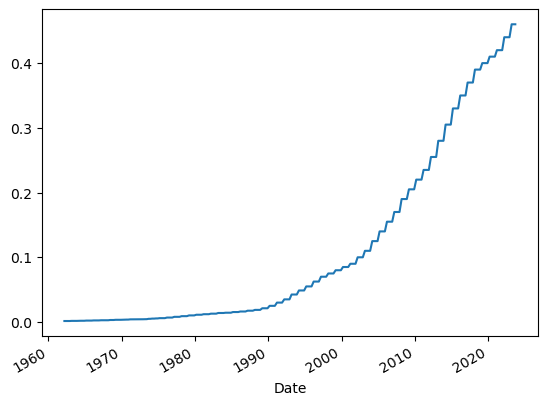

In [38]:
stock.Dividends.plot()

In [39]:
stock["DGR"] = stock.Dividends.pct_change() * 100

In [40]:
notnull = stock.DGR > 0
stock[notnull].tail(10)

,Dividends,DGR
Date,,
2014-03-12,0.305,8.928571
2015-03-12,0.330,8.196721
2016-03-11,0.350,6.060606
2017-03-13,0.370,5.714286
2018-03-14,0.390,5.405405
2019-03-14,0.400,2.564103
2020-03-13,0.410,2.500000
2021-03-12,0.420,2.439024
2022-03-14,0.440,4.761905


<Axes: xlabel='Date'>

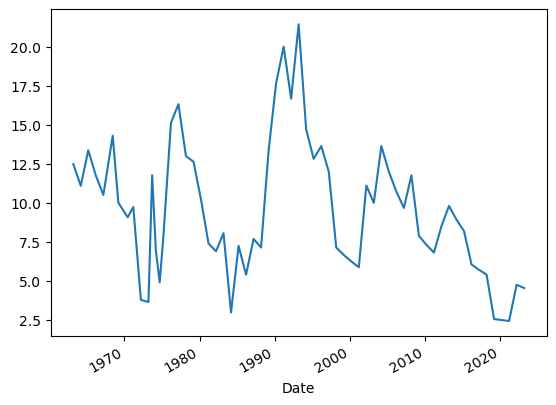

In [41]:
notnull = stock.DGR > 0
stock[notnull].DGR.plot()